In [1]:
import gzip, json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

data = []

for review in parse("Software.json.gz"):
  data.append(review)


In [4]:
vote = []
for d in data:
    if 'vote' in d:
        vote.append(int(d['vote'].replace(',', '')))
    else:
        vote.append(0)
vote = np.array(vote)

In [21]:
from datetime import datetime

date =[]
for d in data:
    date.append(datetime.strptime(d['reviewTime'], '%m %d, %Y'))
min_date = np.min(date)
days = [(d - min_date).days for d in date]

In [ ]:
sales = np.zeros(np.max(days)+1)
votes = np.zeros(np.max(days)+1)
for d, v in zip(days, vote):
    sales[d] = sales[d] + 1
    votes[d] = votes[d] + v
day_index = np.array(range(np.max(days)+1))

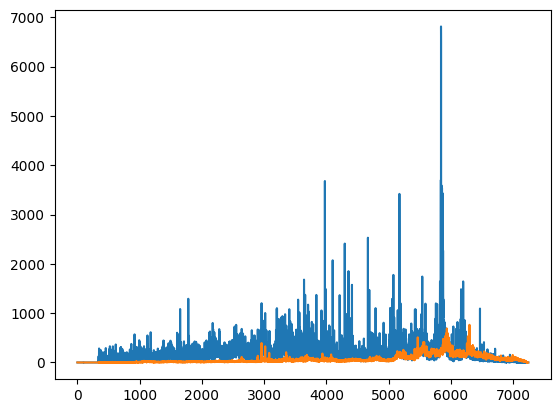

In [18]:
plt.plot(day_index, votes, label="votes")
plt.plot(day_index, sales, label="")
plt.plot(day_index, votes/sales)
plt.show()

/var/folders/1y/zjqt4wsx2t13nckfzvk57xtc0000gn/T/ipykernel_79850/3282235435.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(day_index, votes/sales)


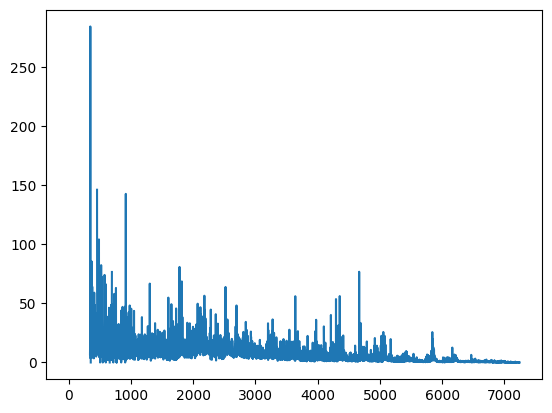

In [19]:
plt.plot(day_index, votes/sales)
plt.show()

/var/folders/1y/zjqt4wsx2t13nckfzvk57xtc0000gn/T/ipykernel_79667/3051670529.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(weekdays, np.log(vote))


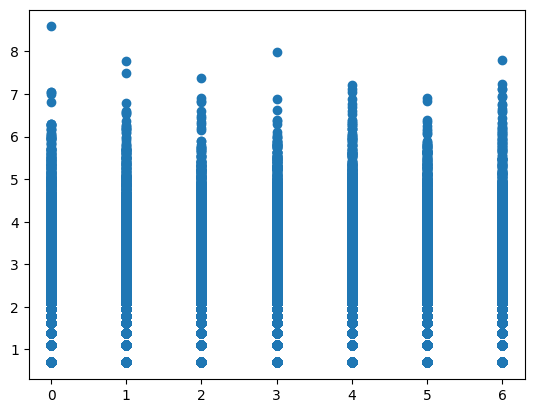

In [18]:
weekdays = [d.weekday() for d in date]
plt.scatter(weekdays, np.log(vote))
plt.show()

In [21]:
from collections import defaultdict

U = set()
I = set()
U_i = defaultdict(set)
I_u = defaultdict(set)
R = dict()

for d in data:
    uid = d['reviewerID']
    iid = d['asin']
    U.add(uid)
    I.add(iid)
    U_i[iid].add(uid)
    I_u[uid].add(iid)
    R[(uid, iid)] = d

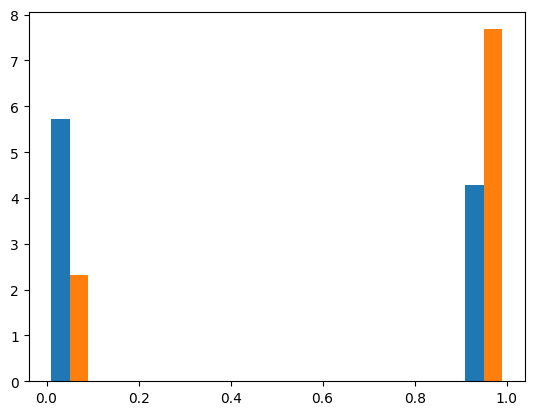

In [52]:
verified_helpfull = [int(d['verified']) for d in data if 'vote' in d]
verified_unhelpfull = [int(d['verified']) for d in data if 'vote' not in d]
plt.hist([verified_helpfull, verified_unhelpfull], density=True)
plt.show()

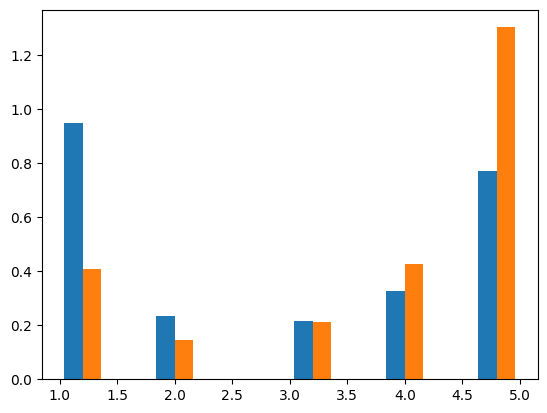

In [51]:
rating_helpful = np.array([int(d['overall']) for d in data if 'vote' in d])
rating_unhelpful = np.array([int(d['overall']) for d in data if 'vote' not in d])
plt.hist([rating_helpful, rating_unhelpful], density=True)
plt.show()

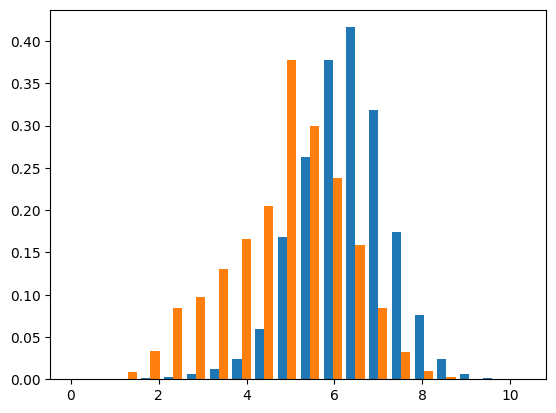

In [73]:
text_len_helpful = np.array([len(d['reviewText'])+1 if 'reviewText' in d else 1 for d in data if 'vote' in d])
text_len_unhelpful = np.array([len(d['reviewText'])+1 if 'reviewText' in d else 1 for d in data if 'vote' not in d])
plt.hist([np.log(text_len_helpful), np.log(text_len_unhelpful)], density=True, bins=20)
plt.show()

3.0


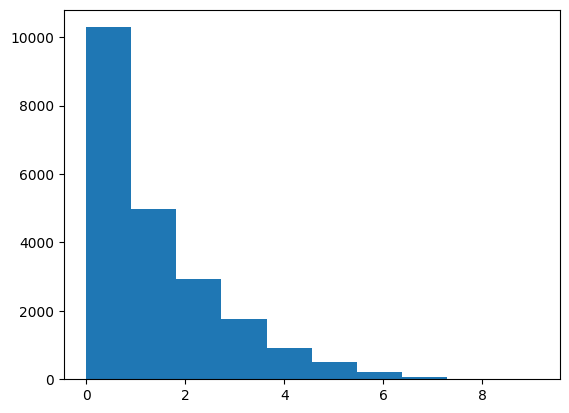

In [53]:
num_of_reviews = np.array([len(U_i[i]) for i in I])
print(np.median(num_of_reviews))
plt.hist(np.log(num_of_reviews), bins=10)
plt.show()

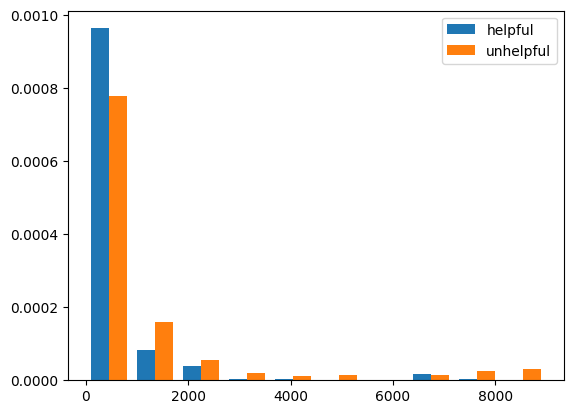

In [69]:
pop_helpful = [len(U_i[d['asin']]) for d in data if 'vote' in d]
pop_unhelpful = [len(U_i[d['asin']]) for d in data if 'vote' not in d]
plt.hist([pop_helpful, pop_unhelpful], label=['helpful', 'unhelpful'], density=True)
plt.legend()
plt.show()

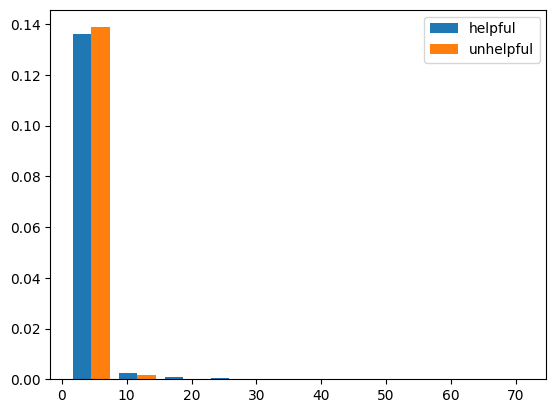

In [72]:
pop_helpful = [len(I_u[d['reviewerID']]) for d in data if 'vote' in d]
pop_unhelpful = [len(I_u[d['reviewerID']]) for d in data if 'vote' not in d]
plt.hist([pop_helpful, pop_unhelpful], label=['helpful', 'unhelpful'], density=True)
plt.legend()
plt.show()

3.0


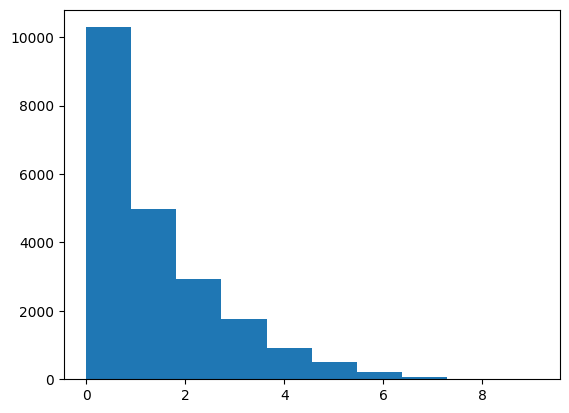

In [70]:
num_of_reviews = np.array([len(U_i[i]) for i in I])
print(np.median(num_of_reviews))
plt.hist(np.log(num_of_reviews), bins=10)
plt.show()

1.0


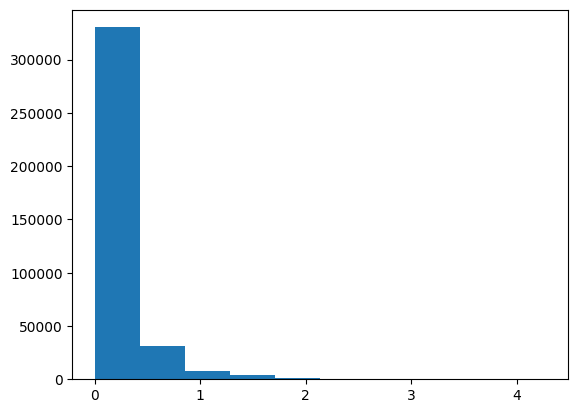

In [71]:
num_of_reviews = np.array([len(I_u[u]) for u in U])
print(np.median(num_of_reviews))
plt.hist(np.log(num_of_reviews), bins=10)
plt.show()

5365 2


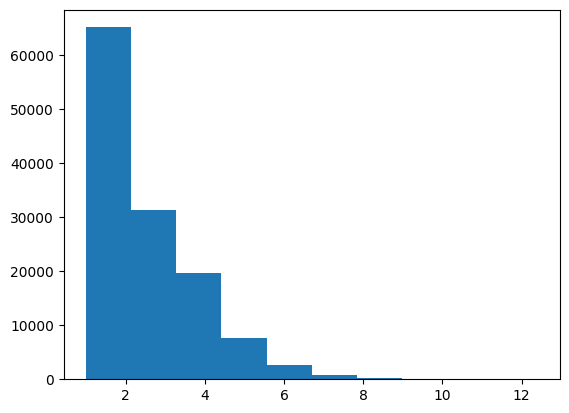

In [54]:
print(np.max(vote),np.min(vote[vote>0]))
# Plotting the histogram
plt.hist(np.log2(vote[vote>0]), bins=10)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

data_t, data_test = train_test_split(data, test_size=0.1, random_state=42)
data_train, data_val = train_test_split(data_t, test_size=0.1/0.9, random_state=42)

In [7]:
len(data_train), len(data_val), len(data_test)

(367548, 45944, 45944)